<a href="https://colab.research.google.com/github/yilewang/TVB_Demo/blob/master/Permutation_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a demo for permutation test

In [15]:
#!/usr/bin/python

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
"""
This is a permutation test python script
Author: Yile Wang
Date: 07/11/2021
"""


def PermutationTest(x,y,iteration, visual = False):
    """
    Args:   
        x: data list1 1-d array
        y: data list2 1-d array
        iteration: iteration number for the test
        visualization (boolean): the default value is False. If it is True, the permutation histgram will be generated
    Returns:
        p-value of the permutation test
    """
# transfer data to array format
    if len(y) > len(x):
        tmp_x = y
        tmp_y = x
    else:
        tmp_x = x
        tmp_y = y
    x = np.array(tmp_x)
    y = np.array(tmp_y)
    #np.hstack((x,y))
    orig_mean = abs(np.mean(x) - np.mean(y))
    aZ = np.hstack((x, y))
    Z_fake = range(len(aZ))
    box = np.array([])
    i = 0
    while i < iteration:
        idx_x = np.random.choice(Z_fake, size= x.shape[0], replace=False)
        idx_y = np.asarray([ele for ele in Z_fake if ele not in idx_x])
        real_x = aZ[idx_x]
        real_y = aZ[idx_y]
        p_mean = np.mean(real_x) - np.mean(real_y)
        box = np.append(box, p_mean)
        i+=1
    permu_mean = np.mean(box)
    p_value = (box[box > orig_mean].shape[0] + 1) / (iteration + 1) # correction

    
    # visual
    if visual == True:
        print(f"The P-value of the Permutation Test is: {p_value}")
        plt.figure(figsize=(9,8))
        sns.histplot(data=box, bins='auto')
        plt.axvline(x=np.round(permu_mean,3), label='Permutation Mean at {}'.format(np.round(permu_mean,3)),c='g')
        plt.axvline(x=orig_mean, label='Original Mean at {}'.format(orig_mean), c='r', linestyle = 'dashed')
        plt.legend()
        plt.show()
    return p_value

A simple test:

The P-value of the Permutation Test is: 0.4355644355644356


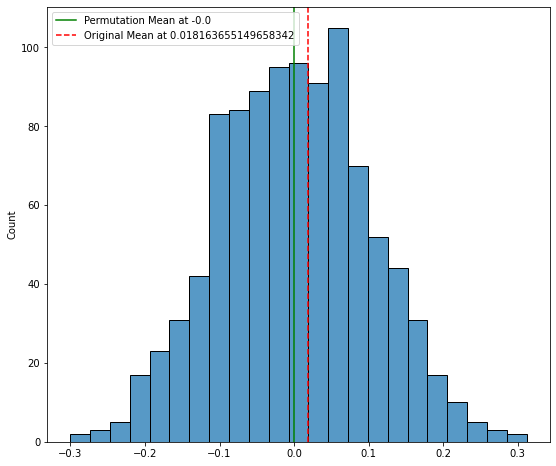

0.4355644355644356

In [16]:
x = np.random.random_sample((20,))
y = np.random.random_sample((12,))
PermutationTest(x, y, 1000, True)